In [1]:
import matplotlib.pyplot as plt

In [2]:
from app import create_app, db
from app.lib.ml_model import MLModel
from app.lib.ml_model_data import MLModelData

In [59]:
epochs = 200

In [4]:
with create_app().app_context():
    data = MLModelData(input_window=30, output_window=30, train_valid_split=0.8)
    data.load()

In [32]:
from random import randrange
def sample_predictions(model, data, num_samples=3):
    # Select a random batch
    d = iter(data.dataloader_valid)
    for i in range(randrange(1, len(data.dataloader_valid))):
        x, y = next(d)
    py = model.predict(x * data.std + data.mean)
    for i in range(num_samples):
        # Select evenly spaced samples from the batch
        index = i * len(x) // num_samples
        plt.plot(range(30), x[index].cpu() * data.std + data.mean)
        plt.plot(range(30, 60), (y[index].cpu() + x[index][-1].cpu()) * data.std + data.mean)
        plt.plot(range(30, 60), py[index].cpu().detach())
        plt.show()

In [60]:
model = MLModel(input_window=30, output_window=30, data_mean=data.mean, data_std=data.std)

In [61]:
%time train_losses, valid_losses = model.fit(epochs, data.dataloader_train, data.dataloader_valid)

0, 0.22250457108020782, 6.277662754058838
1, 0.2217218428850174, 6.277674674987793
2, 0.2213708907365799, 6.277890682220459
3, 0.22121617197990417, 6.278104782104492
4, 0.22115644812583923, 6.278314113616943
5, 0.22114112973213196, 6.278552055358887
6, 0.22111980617046356, 6.278538227081299
7, 0.22111961245536804, 6.278608322143555
8, 0.22112047672271729, 6.278623104095459
9, 0.22112219035625458, 6.278531551361084
10, 0.2211257517337799, 6.2784743309021
11, 0.221170112490654, 6.278463363647461
12, 0.2211301475763321, 6.278565406799316
13, 0.2211398184299469, 6.278593063354492
14, 0.2211330533027649, 6.27864933013916
15, 0.22113658487796783, 6.278594493865967
16, 0.2211446464061737, 6.278715133666992
17, 0.221143901348114, 6.278522968292236
18, 0.2211693674325943, 6.278602123260498
19, 0.22114627063274384, 6.278472423553467
20, 0.22114349901676178, 6.278541564941406
21, 0.22114890813827515, 6.278645038604736
22, 0.2211732417345047, 6.278913497924805
23, 0.22114644944667816, 6.2787094116

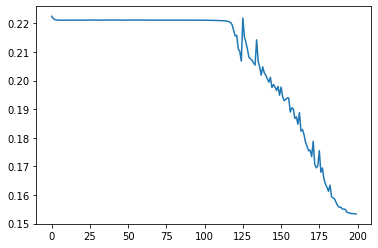

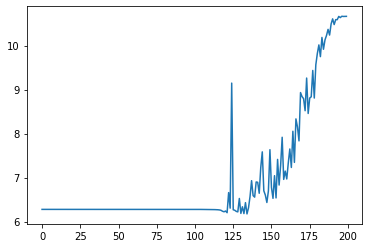

In [62]:
plt.plot(train_losses)
plt.show()
plt.plot(valid_losses)
plt.show()

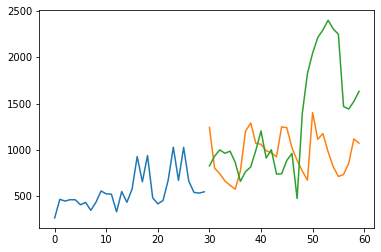

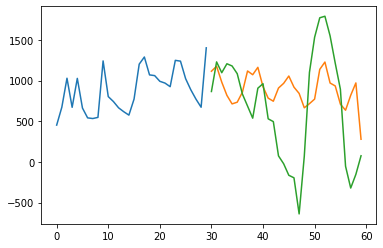

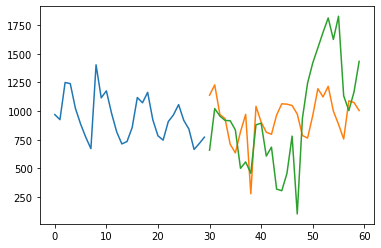

In [66]:
sample_predictions(model, data)

In [68]:
model.save('./model.pt')